## Initial testing

In [1]:
# This is a kind of hack to put the /src folder into the python path. see:
# https://stackoverflow.com/questions/61234609/how-to-import-python-package-from-another-directory
import sys
sys.path.insert(0, '../src')

from regression import GenerateData, UniformX
from Outlier import Outlier
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits import mplot3d
from sklearn.linear_model import LinearRegression

Note from Alex - I modified your code very superficially just to use .generate_dataset() method as we have refactored that.

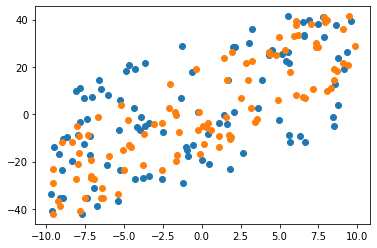

set1 - 
intercept: [2.]; coef: [[2. 3.]]


(array([2.]), array([[2., 3.]]), 1.0)

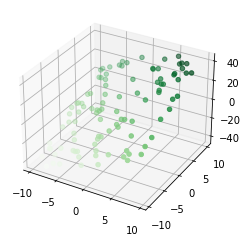

In [2]:
def print_coef(X, y):
    reg = LinearRegression().fit(X, y)
    score=reg.score(X, y)
    coef=reg.coef_
    intercept=reg.intercept_
    print("intercept: "+str(intercept)+"; coef: "+str(coef))
    return     intercept, coef, score
#testing

test1=UniformX(100)
test1.generate_dataset()
plt.plot(test1.X, test1.y, 'o')
plt.show()

ax = plt.axes(projection='3d')
ax.scatter3D(test1.X[:,0].flatten(), test1.X[:,1].flatten(), test1.y, c=test1.y, cmap='Greens')

#add single outlier and test impact for different positions
set1=UniformX(100)
set1.generate_dataset()
X=set1.X
y=set1.y

print("set1 - ")
print_coef(set1.X, set1.y)




In [3]:
test3=Outlier(100)

test3.generate_dataset(original_X = X, original_y = y, original_beta = set1.beta, 
                       positions=(10,10), magnitude=500)
print("Outlier")
print_coef(test3.X, test3.y)

AttributeError: 'Outlier' object has no attribute 'X1'

Note from Alex - I haven't redone the code below to conform to new structure of the class

In [ ]:
set1a_X=np.vstack((set1.X,np.array((10,10))))
set1a_y=np.vstack((set1.y, 500))
print("set1a -")
print_coef(set1a_X, set1a_y)

set1b_X=np.vstack((set1.X,np.array((0,0))))
set1b_y=np.vstack((set1.y, 500))
print("set1b -")
print_coef(set1b_X, set1b_y)

set1c_X=np.vstack((set1.X,np.array((-10,-10))))
set1c_y=np.vstack((set1.y, 500))
print("set1c -")
print_coef(set1c_X, set1c_y)

#test impact for negative direction
set2a_X=np.vstack((set1.X,np.array((10,10))))
set2a_y=np.vstack((set1.y, -500))
print("set2a -")
print_coef(set2a_X, set2a_y)

set2b_X=np.vstack((set1.X,np.array((0,0))))
set2b_y=np.vstack((set1.y, -500))
print("set2b -")
print_coef(set2b_X, set2b_y)

set2c_X=np.vstack((set1.X,np.array((-10,-10))))
set2c_y=np.vstack((set1.y, -500))
print("set2c -")
print_coef(set2c_X, set2c_y)

test3=Outlier(X, y, set1.beta, (10,10), 500)
test3.generate_X()
test3.generate_y()
test3.generate_dataset()
print("Outlier")
print_coef(test3.X, test3.y)

#vary number and magnitude of outliers...

#simulation function to build? use random part as function input?